# Importing Libraries and files

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [5]:
df = pd.read_csv("Credit_train.csv",low_memory=False)
testdf = pd.read_csv("Credit_test.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


# Initial Data Review

In [7]:
df.info()
#after initial review, I notice most data is not null. The lowest non-null count is still almost 85,000 rows of data
#majority of the data is object. There are 8 numerical columns at first glance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.describe()
#From first glance, there is a wide spread amongst most data columns, ex. lowest monthly salary of 300 to as high as 15,000+
#salary. Salary is the only numerical column with a noticeably low count. May have to consider alternatives since it is
#likely an essential column for calculating credit score
#Seems to be some data that is missidentified(age is object instead of int64)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


# Data Dictionary 

* ID (object) ------------------- Numeric, unique ID for each column
* Customer_ID (object) ---------- Unique identifier for each customer
* Month (object) ---------------- The month of each credit application
* Name (object) ----------------- Name of the customer applying
* Age (object) ------------------ Age of the customer applying
* SSN (object) ------------------ Unique Social identifier for each customer
* Occupation (object) ----------- Career choice of the applying customer
* Annual_Income (object) -------- Annual total income of applying customer (before tax?)
* Monthly_Inhand_Salary (float64) Monthly (post_tax) income of applying customer
* Num_Bank_Accounts (int64) ----- Number of bank accounts held by the applying customer
* Num_Credit_Card (int64) ------- Represents the number of other credit cards held by a person 
* Interest_Rate (int64) --------- The interest rate given for applying customer 
* Num_of_Loan (object) ---------- Number of loans held by the applying customer
* Type_of_Loan (object) --------- Types of loans help by applying customer
* Delay_from_due_date (int64) --- Represents the average number of days delayed from the payment date
* Num_of_Delayed_Payment (object) Represents the average number of payments delayed by a person
* Changed_Credit_Limit (object)-- Represents the percentage change in credit card limit
* Num_Credit_Inquiries (float64)- Represents the number of credit card inquiries
* Credit_Mix (object)------------ Represents the classification of the mix of credits
* Outstanding_Debt (object)------ Represents the remaining debt to be paid (in USD)
* Credit_Utilization_Ratio (float64) Represents the utilization ratio of credit card
* Credit_History_Age (object)---- Represents the age of credit history of the person
* Payment_of_Min_Amount (object)- Represents whether only the minimum amount was paid by the person
* Total_EMI_per_month (float64)-- Represents the monthly EMI payments (in USD)
* Amount_invested_monthly (object)Represents the monthly amount invested by the customer (in USD)
* Payment_Behaviour (object)----- Represents the payment behavior of the customer (in USD)
* Monthly_Balance (object)------- Represents the monthly balance amount of the customer (in USD)
* Credit_Score (object)---------- Represents the bracket of credit score (Poor, Standard, Good)

# Exploratory Data Analysis(Pre Cleaned)

/var/folders/x9/jjh0jsds6j95r24k8t86824r0000gn/T/ipykernel_83358/3235086027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Credit_Score', data=df, palette='viridis')


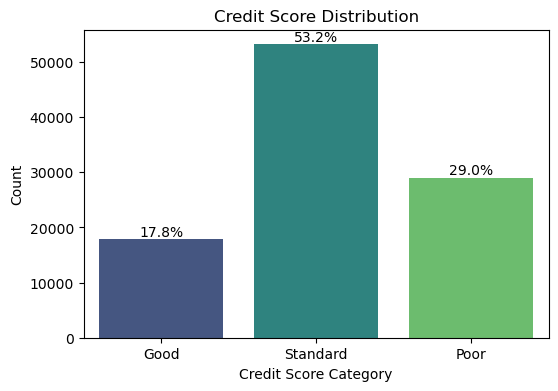

In [12]:
# Credit score distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Credit_Score', data=df, palette='viridis')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')

# Annotate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

In [13]:
#Comment on class imbalance (important for later modeling).

#Note which class dominates and whether stratified sampling will be needed.

In [20]:
#build heatmap to understand missing values
#plt.figure(figsize=(8, 6)) 
#sns.heatmap(df.isnull(),cmap='hot',annot=True,)
#plt.title('Heatmap of Missing Values')
#plt.show()
#heatmap not running so will look at sum instead
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
Will figure out decision on cleaning null values during data cleaning stage

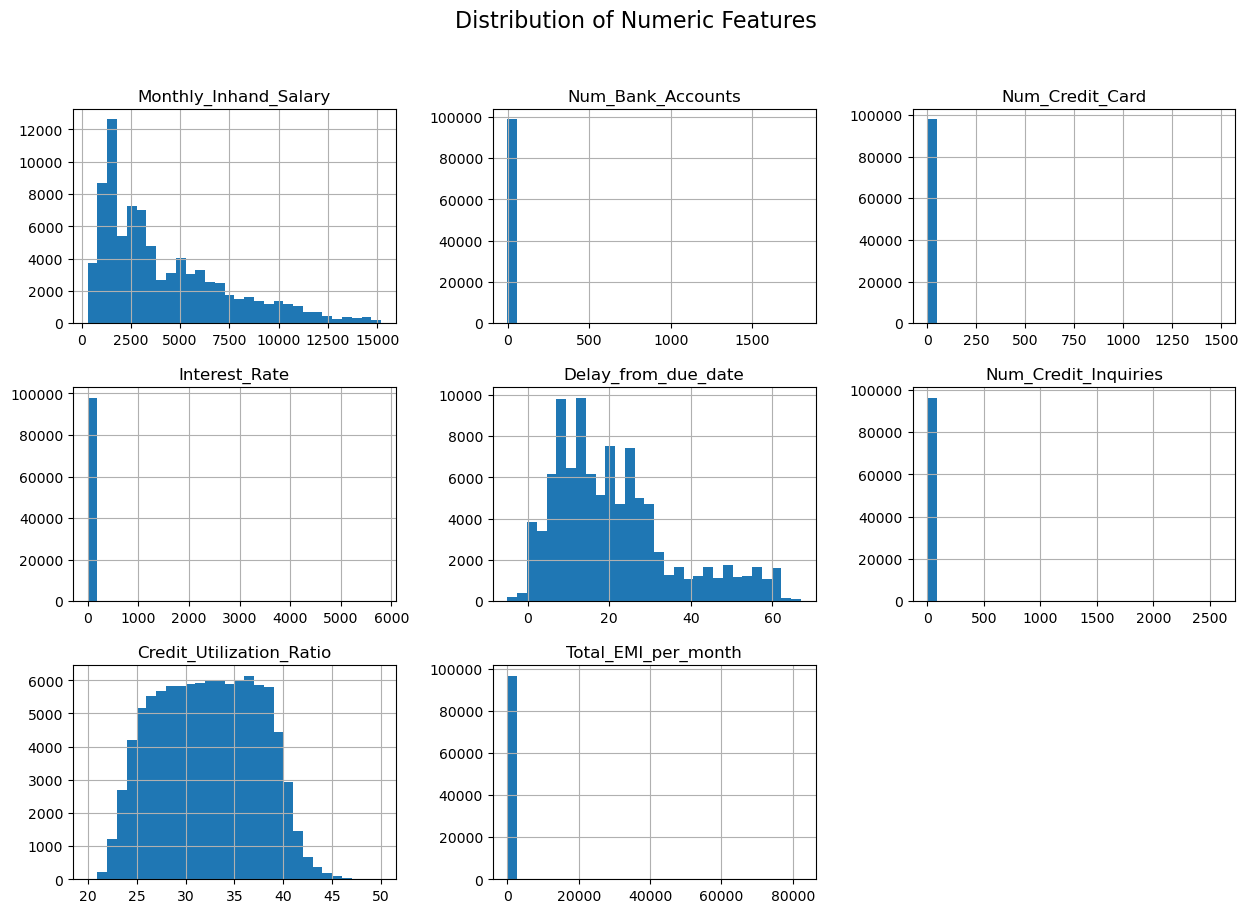

Num_Bank_Accounts           11.202314
Num_Credit_Inquiries         9.786096
Interest_Rate                9.005880
Num_Credit_Card              8.457890
Total_EMI_per_month          7.102418
Monthly_Inhand_Salary        1.127252
Delay_from_due_date          0.966380
Credit_Utilization_Ratio     0.028616
dtype: float64

In [28]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Summary statistics
df[num_cols].describe()

# Histograms
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

# Check skewness
skew_vals = df[num_cols].apply(lambda x: skew(x.dropna()))
skew_vals.sort_values(ascending=False)

In [43]:
df.duplicated().sum()
df.shape

(100000, 28)